In [30]:
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
from pathlib import Path

import pandas as pd
import numpy as np
np.random.seed(6)

from tifffile import imread
from tifffile import imwrite
import matplotlib.pyplot as plt

In [31]:
dapi_name = 'cyc_1_dapi.tif'
BASE_DIR = Path('E:/TMC/PRISM_pipeline/dataset/processed')
RUN_ID = '_example_dataset'
src_dir = BASE_DIR / f'{RUN_ID}_processed'
stc_dir = src_dir / 'stitched'
read_dir = src_dir / 'readout'
seg_dir = src_dir / 'segmented'
os.makedirs(seg_dir, exist_ok=True)

In [32]:
len(pd.read_csv(read_dir/'intensity_all.csv', index_col=0))

270416

In [33]:
len(pd.read_csv(read_dir/'intensity_deduplicated.csv', index_col=0))

246782

In [34]:
intensity = pd.read_csv(read_dir/'intensity_all.csv', index_col=0)

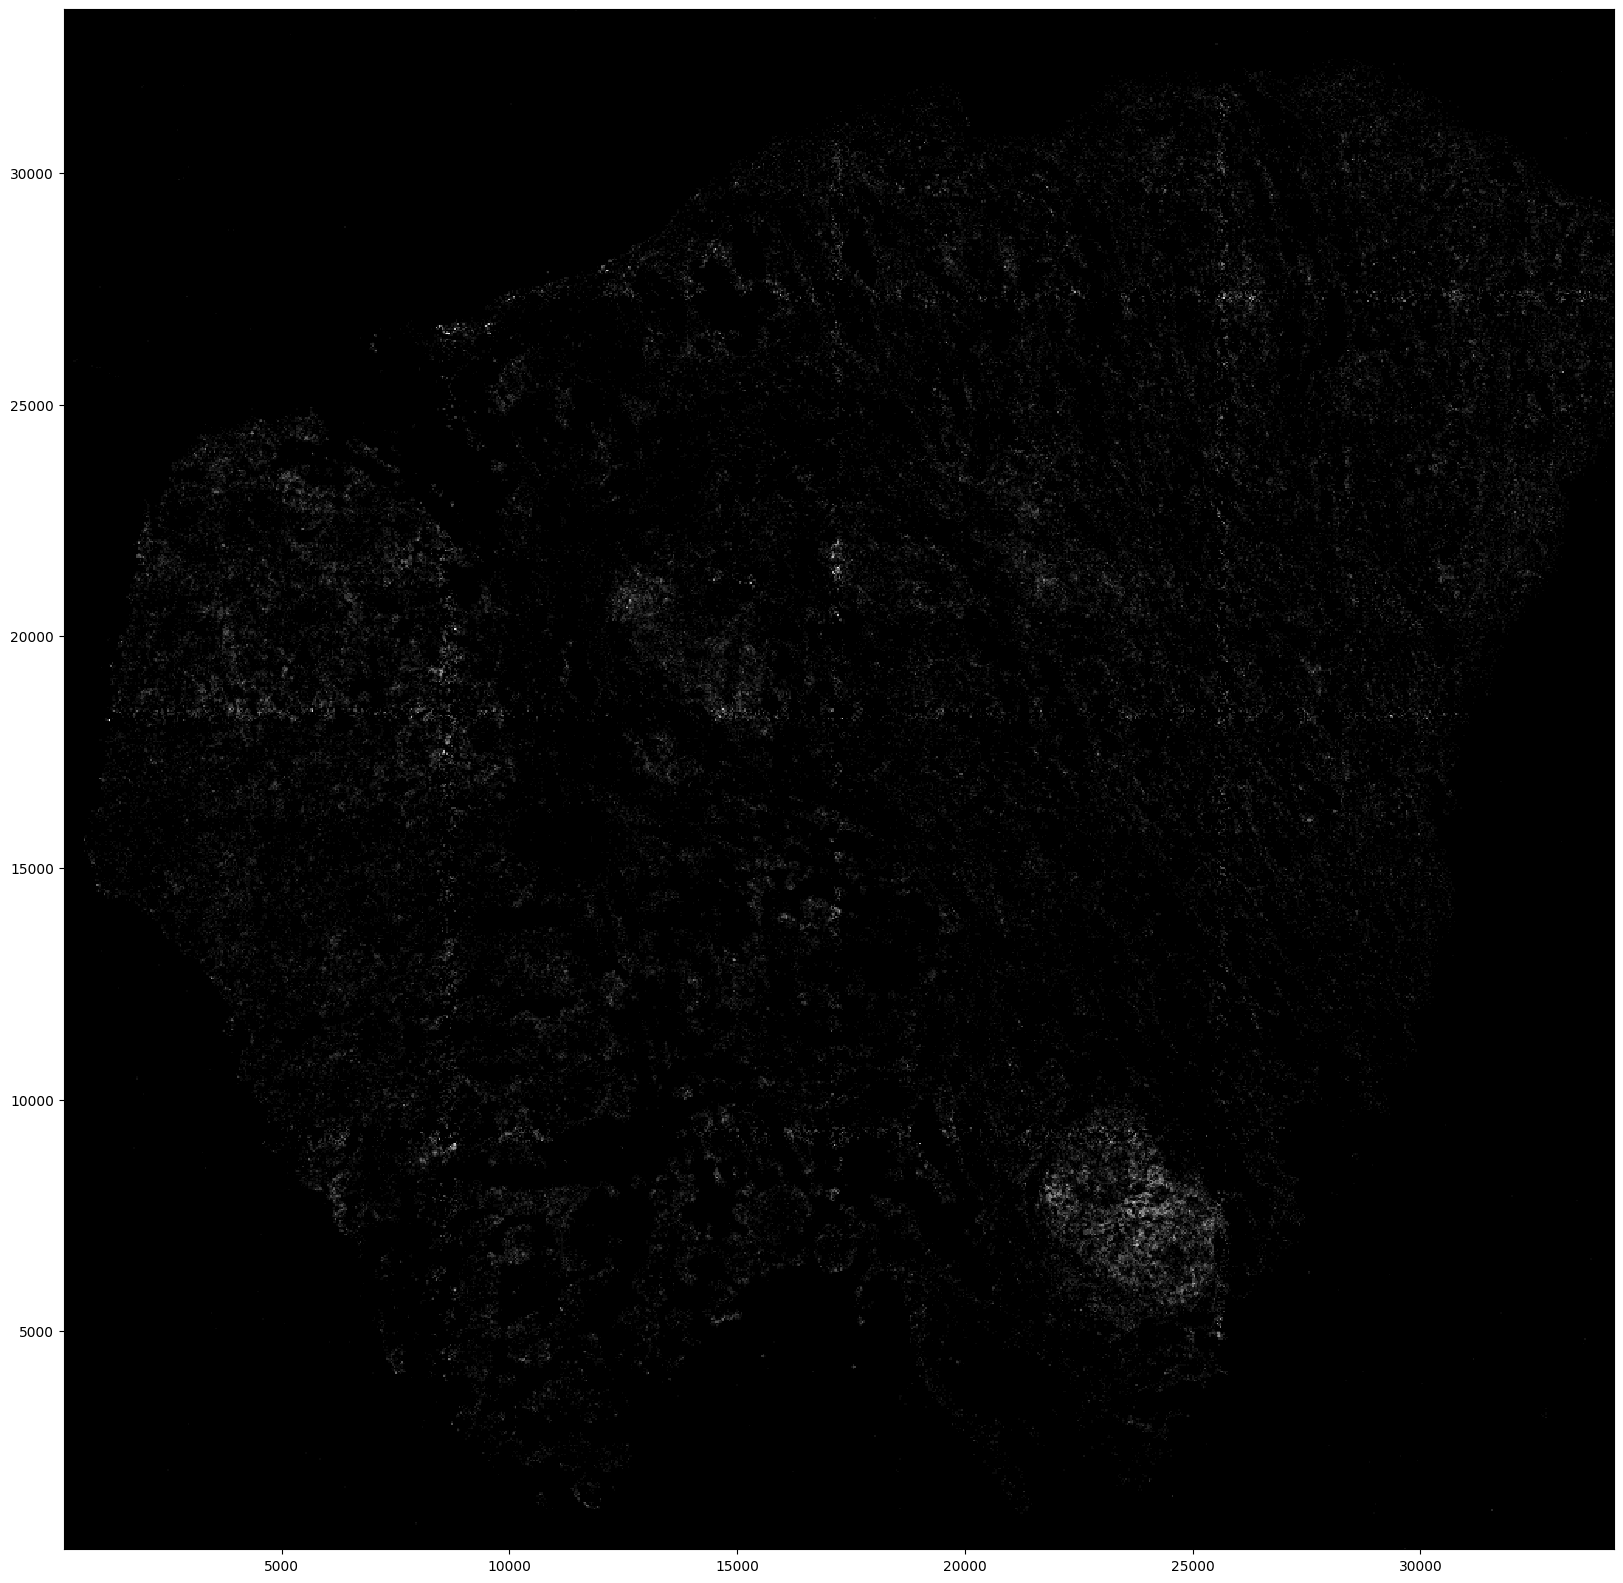

In [35]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.hist2d(intensity['X'], intensity['Y'],
           vmin=0, bins=[1000,1000], cmap='gray',)
plt.show()

In [36]:
intensity_deduplicated = pd.read_csv(read_dir/'intensity_deduplicated.csv', index_col=0)

intensity_block_0_0.csv: 4480 points, xlim=[43, 8964], ylim=[727, 9527]
intensity_block_0_1.csv: 23806 points, xlim=[212, 8964], ylim=[9033, 18556]
intensity_block_0_2.csv: 28275 points, xlim=[443, 8964], ylim=[18061, 27544]
intensity_block_0_3.csv: 15 points, xlim=[1015, 6383], ylim=[27337, 32967]
intensity_block_1_0.csv: 13866 points, xlim=[8469, 17429], ylim=[1167, 9526]
intensity_block_1_1.csv: 23644 points, xlim=[8469, 17429], ylim=[9031, 18555]
intensity_block_1_2.csv: 24688 points, xlim=[8469, 17430], ylim=[18060, 27584]
intensity_block_1_3.csv: 5682 points, xlim=[9493, 17429], ylim=[27090, 33532]
intensity_block_2_0.csv: 34476 points, xlim=[16940, 25893], ylim=[1083, 9526]
intensity_block_2_1.csv: 17926 points, xlim=[16935, 25894], ylim=[9031, 18555]
intensity_block_2_2.csv: 31469 points, xlim=[16935, 25896], ylim=[18060, 27584]
intensity_block_2_3.csv: 14272 points, xlim=[16935, 25896], ylim=[27089, 33339]
intensity_block_3_0.csv: 1997 points, xlim=[25401, 33730], ylim=[295, 9

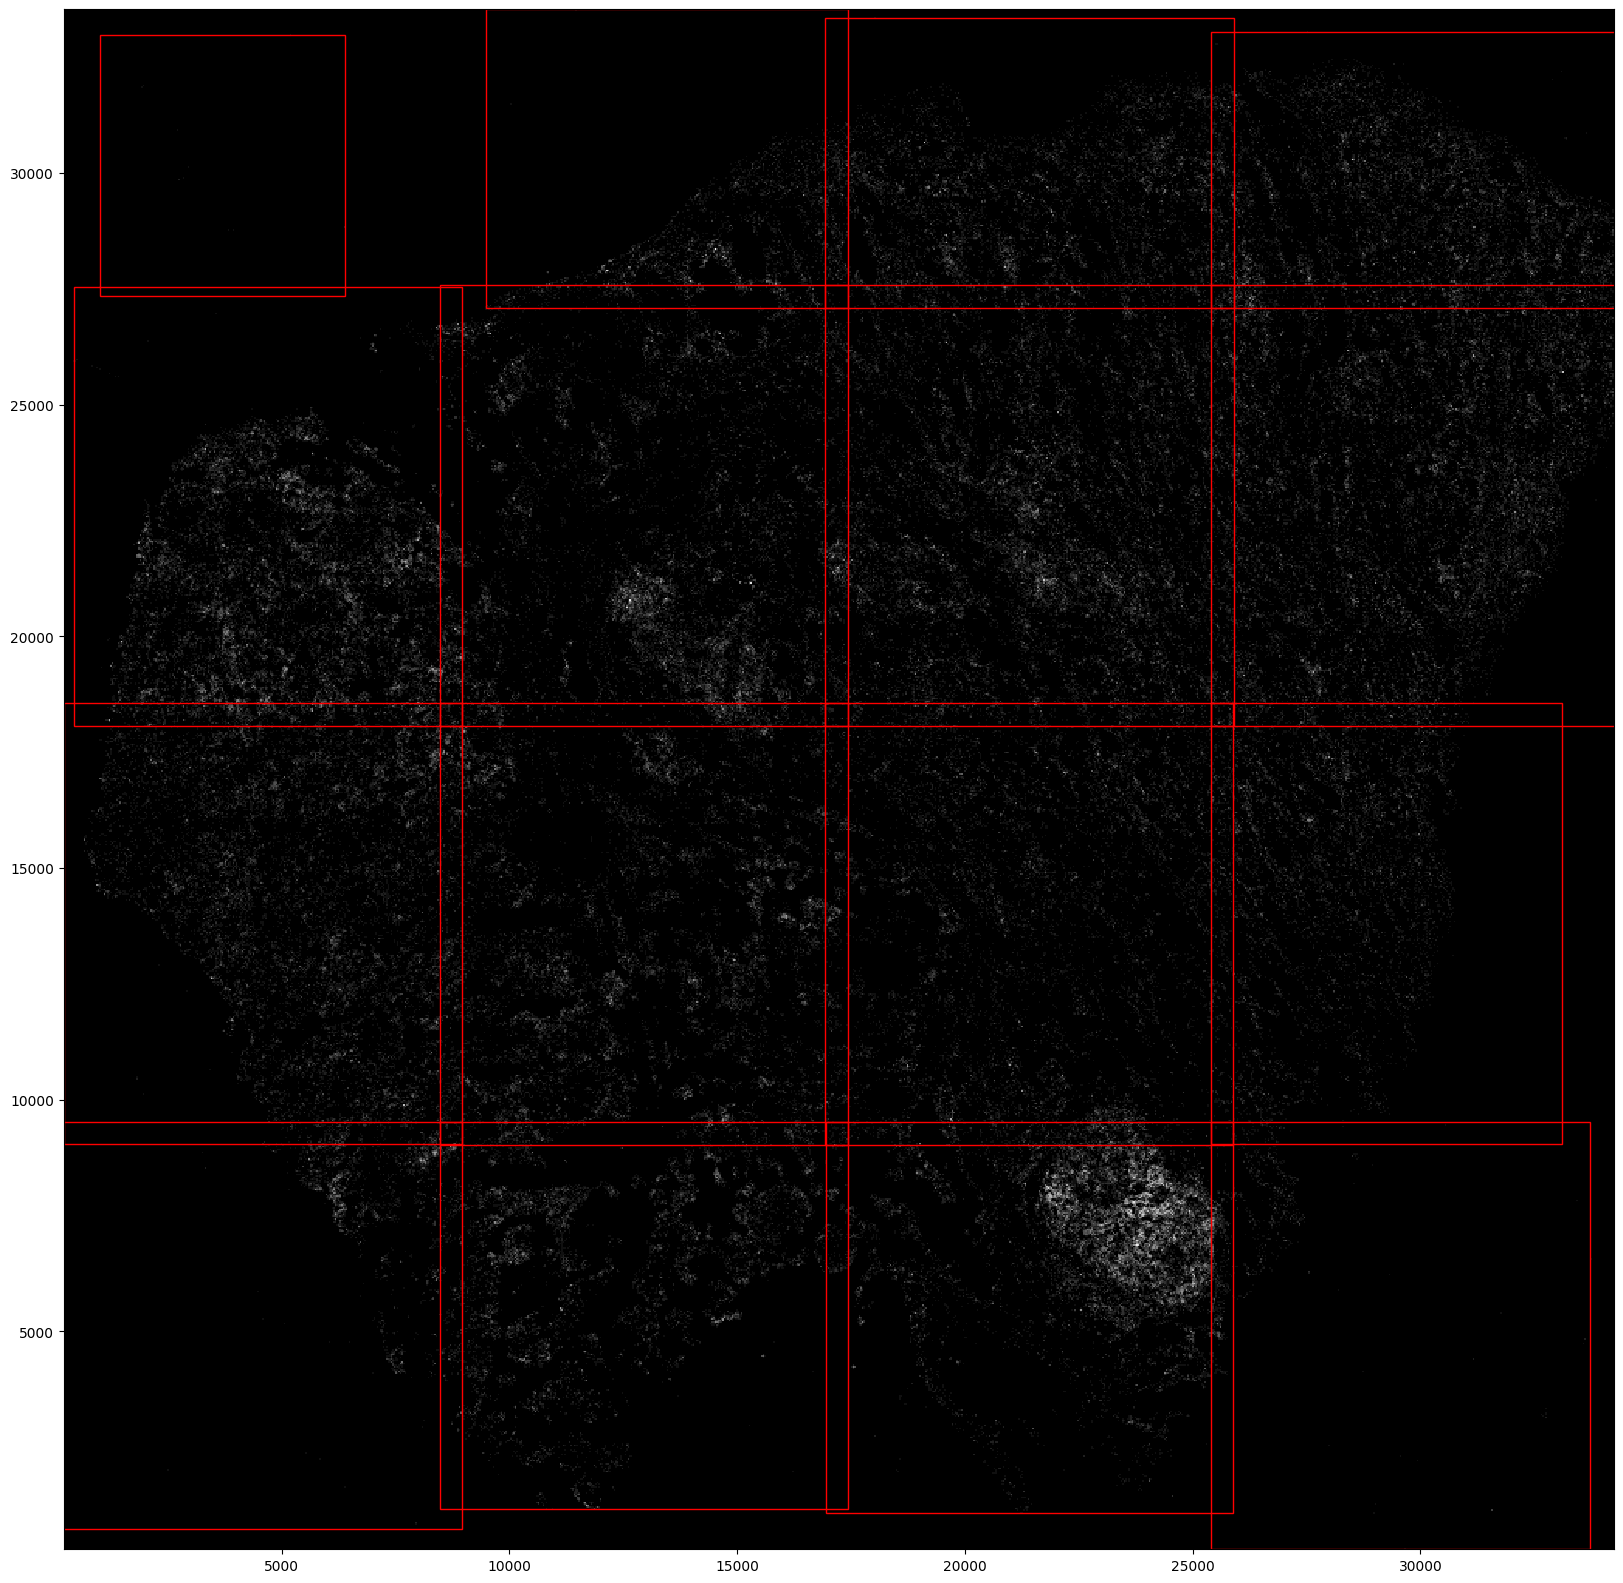

In [37]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.hist2d(intensity_deduplicated['X'], intensity_deduplicated['Y'],
           vmin=0, bins=[1000,1000], cmap='gray',)

regions = []
for file in os.listdir(read_dir/'tmp'): 
    df = pd.read_csv(read_dir/'tmp'/file)
    regions.append({'xlim': [df['X'].min(), df['X'].max()], 'ylim': [df['Y'].min(), df['Y'].max()]})
    print('{}: {} points, xlim=[{}, {}], ylim=[{}, {}]'.format(
        file, len(df), df['X'].min(), df['X'].max(), df['Y'].min(), df['Y'].max()))
    
import matplotlib.patches as patches
for region in regions:
    width = region['xlim'][1] - region['xlim'][0]
    height = region['ylim'][1] - region['ylim'][0]
    rect = patches.Rectangle((region['xlim'][0], region['ylim'][0]), width, height,
                             linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.show()

In [40]:
import cv2
TOPHAT_KERNEL_SIZE = 7
def tophat_spots(image):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(TOPHAT_KERNEL_SIZE,TOPHAT_KERNEL_SIZE))
    return cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)

In [41]:
print(8 * np.mean(tophat_spots(imread(stc_dir/'cyc_1_cy3.tif'))))

164.65645315815107
